

# Overview of artifact detection

This tutorial covers the basics of artifact detection, and introduces the
artifact detection tools available in MNE-Python.

We begin as always by importing the necessary Python modules and loading some
`example data <sample-dataset>`:


In [4]:
import os
import numpy as np
import mne
from helper_code import load_recording_data, get_utility_frequency

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

header_file = 'C:\\Users\\kevin\\mne_test_eeg\\0284\\0284_001_004_'

In [6]:
# Check EEG channel.
eeg_header_file = os.path.join(header_file + 'EEG' + '.hea')
eeg_data, eeg_channels, eeg_sampling_frequency = load_recording_data(eeg_header_file)

In [7]:
print(eeg_data.shape)
print(eeg_channels)
print(eeg_sampling_frequency)

(19, 1578500)
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
500.0


In [8]:
# Check ECG channel.
ecg_header_file = os.path.join(header_file + 'ECG' + '.hea')
ecg_data, ecg_channels, ecg_sampling_frequency = load_recording_data(ecg_header_file)

In [9]:
print(ecg_data.shape)
print(ecg_channels)
print(ecg_sampling_frequency)

(1, 1578500)
['ECG']
500.0


In [10]:
# # Plot EEG with matplotlib:\
# fig, axes = plt.subplots(19,1)
# fig.set_size_inches(30, 20)

# styles = ['r-', 'g-', 'y-', 'm-', 'k-', 'c-', 'b-', 'r-', 'g-', 'y-', 'm-', 'k-', 'c-', 'b-', 'r-', 'g-', 'y-', 'm-', 'k-', 'c-']
# lines = [ax.plot(eeg_data[i], style)[0] for i, ax, style in zip(range(len(axes)), axes, styles)]

## Insert data into RawArray and set as an EEG channels type

Creating RawArray with float64 data, n_channels=19, n_times=1578500
    Range : 0 ... 1578499 =      0.000 ...  3156.998 secs
Ready.


Creating RawArray with float64 data, n_channels=1, n_times=1578500
    Range : 0 ... 1578499 =      0.000 ...  3156.998 secs
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Using matplotlib as 2D backend.


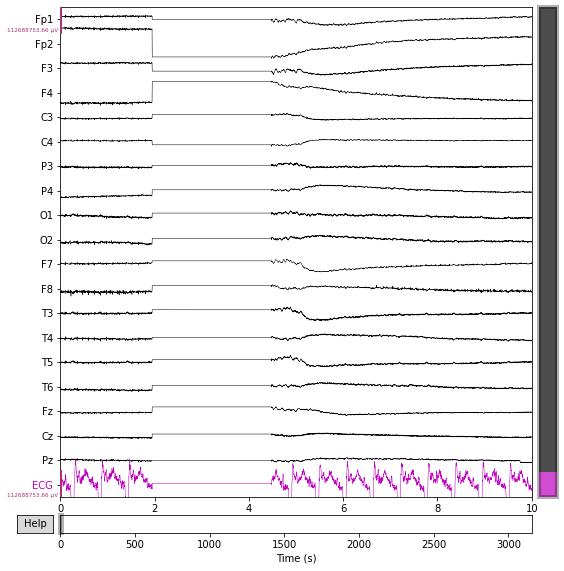

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG, 1 ECG
 custom_ref_applied: False
 dig: 0 items
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 500.0 Hz
>

In [11]:
# Read EEG
raw = mne.io.RawArray(eeg_data, mne.create_info(eeg_channels, eeg_sampling_frequency, ch_types='eeg')) #
# Read ECG
raw.add_channels([mne.io.RawArray(ecg_data, mne.create_info(ecg_channels, ecg_sampling_frequency, ch_types='ecg'))]) # add EOG channels

# raw.set_eeg_reference()  # set EEG average reference
raw.pick_types(meg=False, eeg=True, ecg=True, eog=False)  # remove other channels

raw.plot(scalings = {'eeg': 1/(17.748e-3), 'ecg': 1/(17.748e-3)}) # data from the header file
raw.info

In [35]:
type(eeg_data)
print(eeg_data.shape)
eeg_data

(19, 1578500)


array([[ 16.68519  ,  14.738584 ,  14.349263 , ...,  -8.120126 ,
         -8.676298 ,  -9.955497 ],
       [137.19885  , 135.56487  , 134.26894  , ...,  -8.902431 ,
         -8.9587755, -10.14201  ],
       [ 38.363438 ,  35.43687  ,  37.28188  , ...,  26.784422 ,
         25.32114  ,  25.512003 ],
       ...,
       [-25.29382  , -27.344456 , -27.148405 , ...,  -6.3479614,
         -8.008076 ,  -7.812024 ],
       [-13.96483  , -16.602201 , -14.843954 , ...,   1.2687354,
          0.       ,   1.1713325],
       [  3.0273867,   2.148771 ,   3.0273867, ...,   3.6131306,
          2.245873 ,   2.245873 ]], dtype=float32)

In [40]:
data,time = raw[:-1,:]

In [41]:
print(type(data), type(time))
print(data.shape)
print(time.shape)
print(data)
print(time)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(19, 1578500)
(1578500,)
[[ 16.6851902   14.73858356  14.34926319 ...  -8.12012577  -8.67629814
   -9.95549679]
 [137.19885254 135.56486511 134.26893616 ...  -8.90243053  -8.95877552
  -10.14200974]
 [ 38.36343765  35.43687057  37.28187943 ...  26.78442192  25.32114029
   25.51200294]
 ...
 [-25.29381943 -27.34445572 -27.14840508 ...  -6.34796143  -8.00807571
   -7.81202412]
 [-13.9648304  -16.60220146 -14.84395409 ...   1.26873541   0.
    1.17133248]
 [  3.02738667   2.14877105   3.02738667 ...   3.61313057   2.24587297
    2.24587297]]
[0.000000e+00 2.000000e-03 4.000000e-03 ... 3.156994e+03 3.156996e+03
 3.156998e+03]


In [12]:
raw.describe()

<RawArray | 20 x 1578500 (3157.0 s), ~240.9 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV    -3150386230.47  889876.78  7897656.44  19021116.26  494437774.66
 1  Fp2   EEG   µV    -3150277099.61  -1295923.47  5465416.43  19607885.36  542203125.00
 2  F3    EEG   µV    -3150127929.69  1272419.10  6425716.40  14569198.61  1019207702.64
 3  F4    EEG   µV    -211329284.67  -51856174.47  -27050563.81  -16407415.39  31444149.02
 4  C3    EEG   µV    -42090671.54  -10840581.89  -4394946.58  -390948.33  51756977.08
 5  C4    EEG   µV    -50684074.40  -97480.40  4003864.29  10741479.87  43261230.47
 6  P3    EEG   µV    -45410369.87  -1953118.92  2246585.37  6640034.20  47948997.50
 7  P4    EEG   µV    -1276370605.47  -11823655.13  -5277338.50  684845.45  43648826.60
 8  O1    EEG   µV    -177537872.31  -13768967.63  -6739699.84       0.00  59669143.68
 9  O2    EEG   µV    -204001907.35  -10743271.83  -4592169.76  1661376.60  

In [13]:
print(raw.info)
print(raw.info["ch_names"])

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG, 1 ECG
 custom_ref_applied: False
 dig: 0 items
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 500.0 Hz
>
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'ECG']


## Set Montage

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


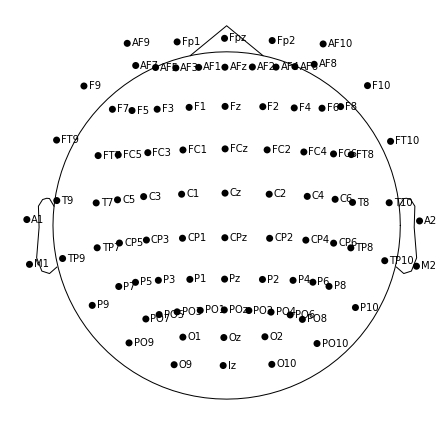

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


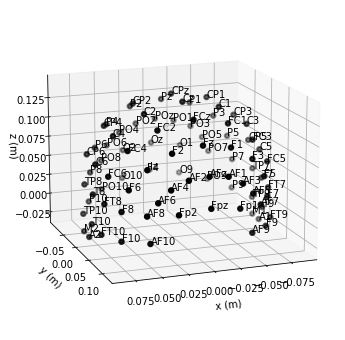

In [14]:
selected_montage = mne.channels.make_standard_montage("standard_1020")
selected_montage.plot()  # 2D

fig = selected_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

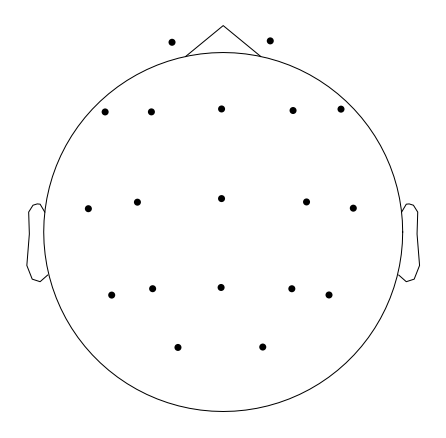

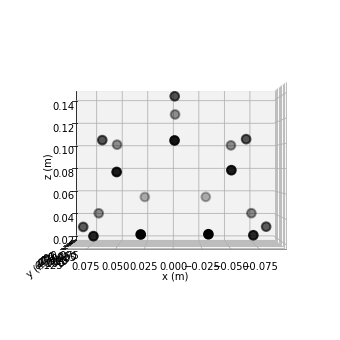

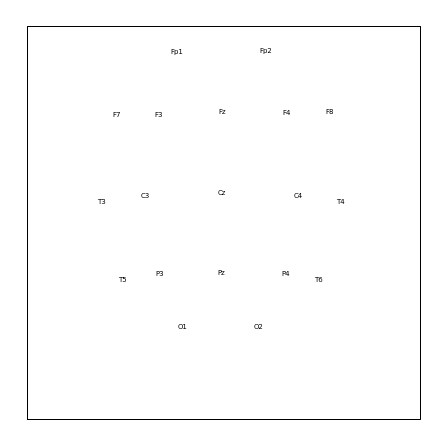

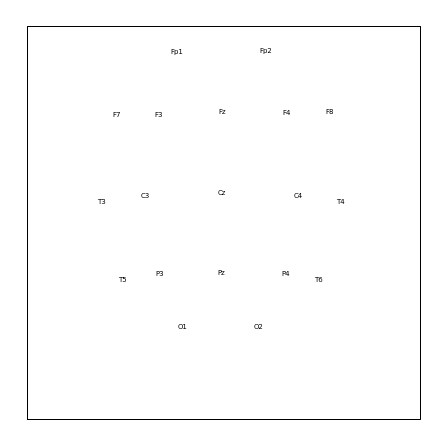

In [15]:
raw.set_montage(selected_montage)
raw.plot_sensors()
raw.plot_sensors("3d")

layout_from_raw = mne.channels.make_eeg_layout(raw.info)
layout_from_raw.plot()

## Get Utility Frequency from the Header File

In [16]:
utility_frequency = None # set to 50 for the final run
with open(eeg_header_file, 'r') as f:
  utility_frequency = get_utility_frequency(f.read())

In [17]:
print(utility_frequency)

50


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 16501 samples (33.002 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.2s finished


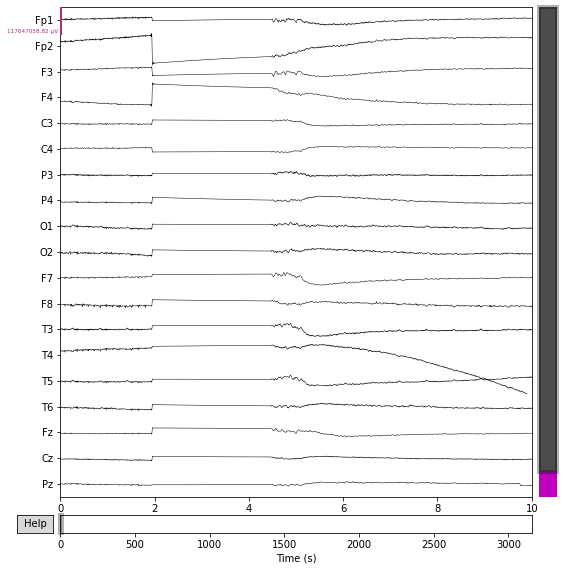

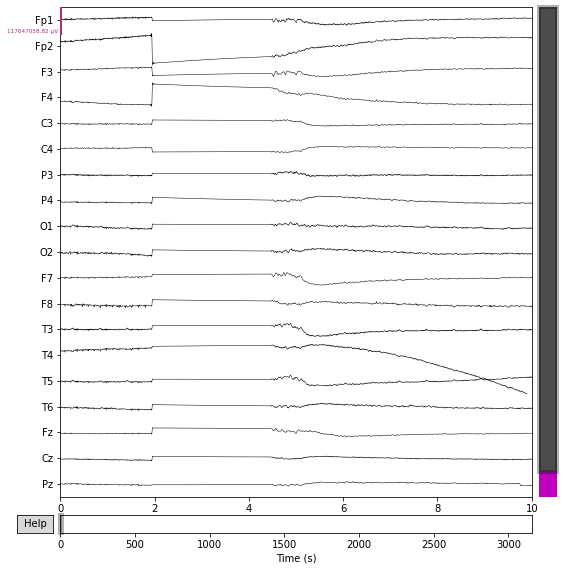

In [517]:
raw.copy().filter(0.1, utility_frequency if not None else 50).plot(scalings = {'eeg': 1/17e-3}, n_channels = 19, title = 'Raw EEG data', show = True, block = True)

In [18]:
ica = mne.preprocessing.ICA(n_components=10, random_state=97, max_iter=800)

In [26]:
ica.fit(raw.copy().filter(0.1, utility_frequency))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 16501 samples (33.002 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Fitting ICA to data using 19 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.9s finished


Selecting by number: 10 components
Fitting ICA took 12.2s.


Method,fastica
Fit,29 iterations on raw data (1578500 samples)
ICA components,10
Available PCA components,19
Channel types,eeg
ICA components marked for exclusion,—


In [546]:
raw_only_eeg = raw.copy().pick_types(meg=False, eeg=True, ecg=False, eog=False)
raw_only_ecg = raw.copy().pick_types(meg=False, eeg=False, ecg=True, eog=False)

Creating RawArray with float64 data, n_channels=9, n_times=1578500
    Range : 0 ... 1578499 =      0.000 ...  3156.998 secs
Ready.


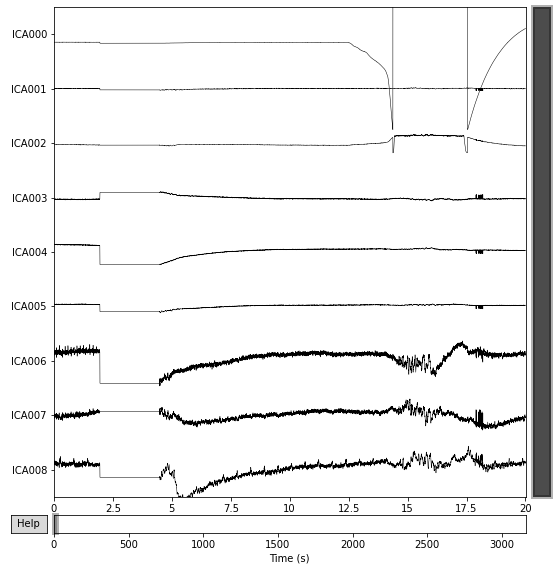

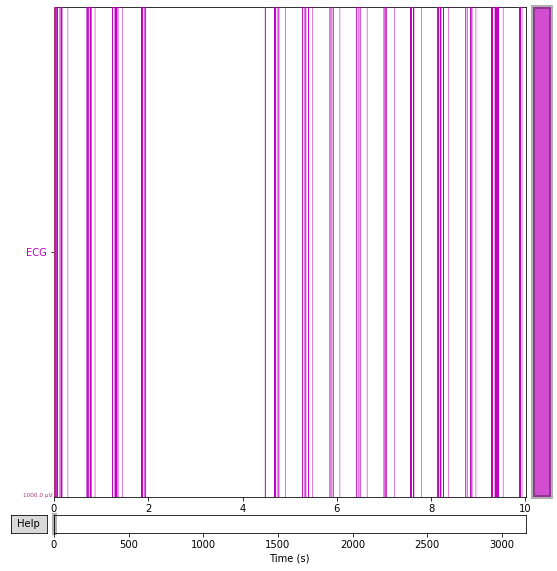

In [550]:
ica_plot = ica.plot_sources(raw_only_eeg, picks=[0,1,2,3,4,5,6,7,8])
ica_plot = raw_only_ecg.plot()

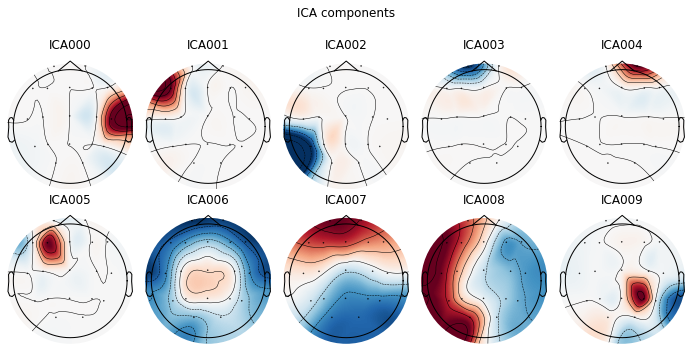

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1578 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1578 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1578 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1578 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1578 matching events found
No baseline correction applied
0 projection items activated


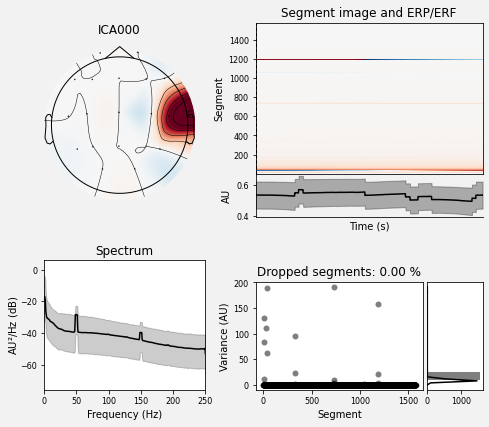

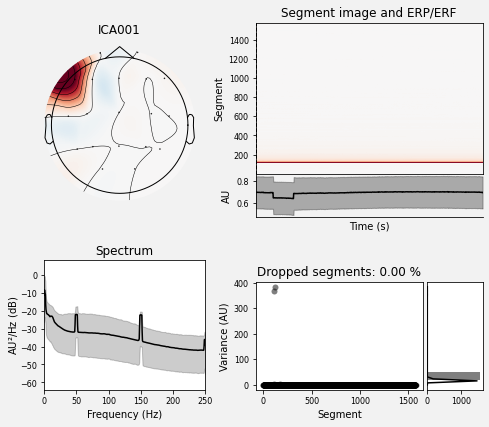

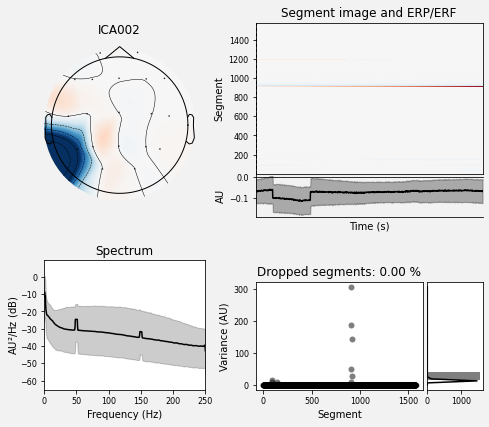

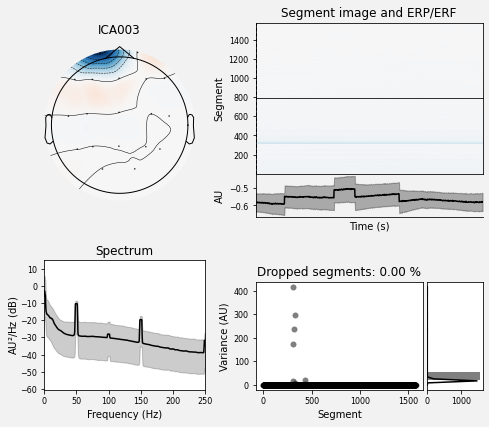

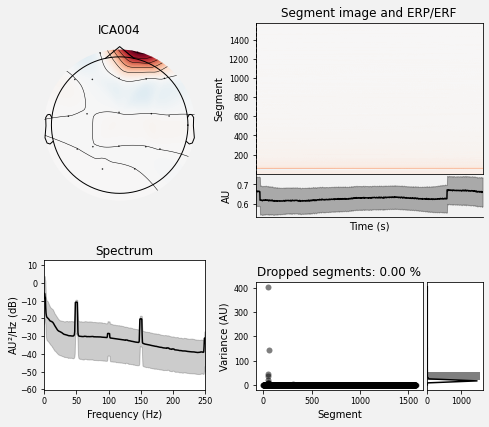

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [552]:
ica.plot_components()
ica.plot_properties(raw)

Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Number of ECG events detected : 5143 (average pulse 97 / min.)
Not setting metadata
5143 matching events found
No baseline correction applied
Using data from preloaded Raw for 5143 events and 501 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


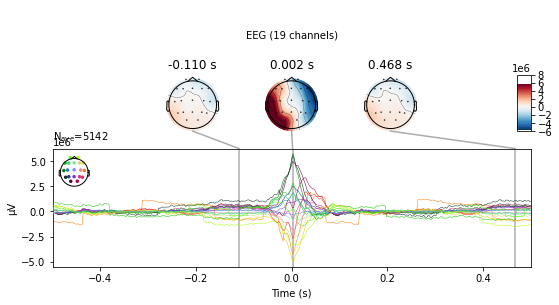

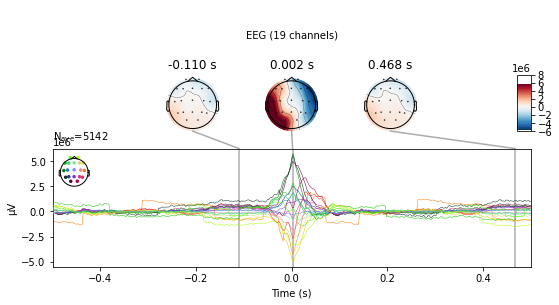

In [472]:
ecg_evoked = mne.preprocessing.create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))
ecg_evoked.plot_joint()

In [403]:
ica.exclude = [2, 4]  # details see above

## What are artifacts?

Artifacts are parts of the recorded signal that arise from sources other than
the source of interest (i.e., neuronal activity in the brain). As such,
artifacts are a form of interference or noise relative to the signal of
interest. There are many possible causes of such interference, for example:

- Environmental artifacts
    - Persistent oscillations centered around the `AC power line frequency`_
      (typically 50 or 60 Hz)
    - Brief signal jumps due to building vibration (such as a door slamming)
    - Electromagnetic field noise from nearby elevators, cell phones, the
      geomagnetic field, etc.

- Instrumentation artifacts
    - Electromagnetic interference from stimulus presentation (such as EEG
      sensors picking up the field generated by unshielded headphones)
    - Continuous oscillations at specific frequencies used by head position
      indicator (HPI) coils
    - Random high-amplitude fluctuations (or alternatively, constant zero
      signal) in a single channel due to sensor malfunction (e.g., in surface
      electrodes, poor scalp contact)

- Biological artifacts
    - Periodic `QRS`_-like signal patterns (especially in magnetometer
      channels) due to electrical activity of the heart
    - Short step-like deflections (especially in frontal EEG channels) due to
      eye movements
    - Large transient deflections (especially in frontal EEG channels) due to
      blinking
    - Brief bursts of high frequency fluctuations across several channels due
      to the muscular activity during swallowing

There are also some cases where signals from within the brain can be
considered artifactual. For example, if a researcher is primarily interested
in the sensory response to a stimulus, but the experimental paradigm involves
a behavioral response (such as button press), the neural activity associated
with the planning and executing the button press could be considered an
artifact relative to signal of interest (i.e., the evoked sensory response).

<div class="alert alert-info"><h4>Note</h4><p>Artifacts of the same genesis may appear different in recordings made by
    different EEG or MEG systems, due to differences in sensor design (e.g.,
    passive vs. active EEG electrodes; axial vs. planar gradiometers, etc).</p></div>


## What to do about artifacts

There are 3 basic options when faced with artifacts in your recordings:

1. *Ignore* the artifact and carry on with analysis
2. *Exclude* the corrupted portion of the data and analyze the remaining data
3. *Repair* the artifact by suppressing artifactual part of the recording
   while (hopefully) leaving the signal of interest intact

There are many different approaches to repairing artifacts, and MNE-Python
includes a variety of tools for artifact repair, including digital filtering,
independent components analysis (ICA), Maxwell filtering / signal-space
separation (SSS), and signal-space projection (SSP). Separate tutorials
demonstrate each of these techniques for artifact repair. Many of the
artifact repair techniques work on both continuous (raw) data and on data
that has already been epoched (though not necessarily equally well); some can
be applied to `memory-mapped`_ data while others require the data to be
copied into RAM. Of course, before you can choose any of these strategies you
must first *detect* the artifacts, which is the topic of the next section.


## Artifact detection

MNE-Python includes a few tools for automated detection of certain artifacts
(such as heartbeats and blinks), but of course you can always visually
inspect your data to identify and annotate artifacts as well.

We saw in `the introductory tutorial <tut-overview>` that the example
data includes :term:`SSP projectors <projector>`, so before we look at
artifacts let's set aside the projectors in a separate variable and then
remove them from the :class:`~mne.io.Raw` object using the
:meth:`~mne.io.Raw.del_proj` method, so that we can inspect our data in it's
original, raw state:



In [21]:
ssp_projectors = raw.info["projs"]
print(ssp_projectors)
raw.del_proj()

[]


<RawArray | 20 x 1578500 (3157.0 s), ~240.9 MB, data loaded>

### Low-frequency drifts

Low-frequency drifts are most readily detected by visual inspection using the
basic :meth:`~mne.io.Raw.plot` method, though it is helpful to plot a
relatively long time span and to disable channel-wise DC shift correction.
Here we plot 60 seconds and show all the magnetometer channels:



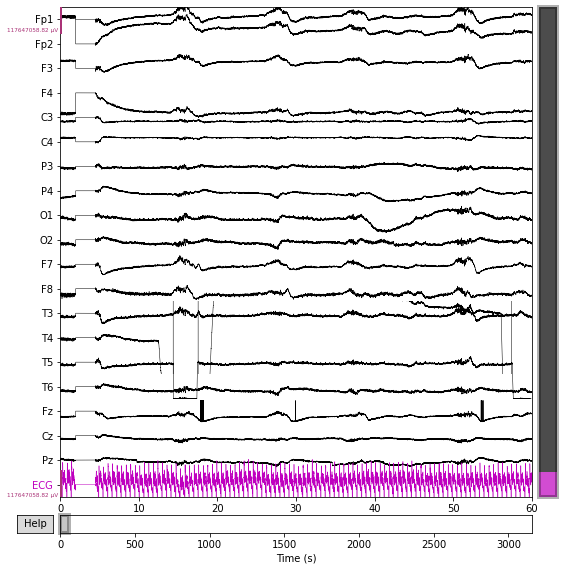

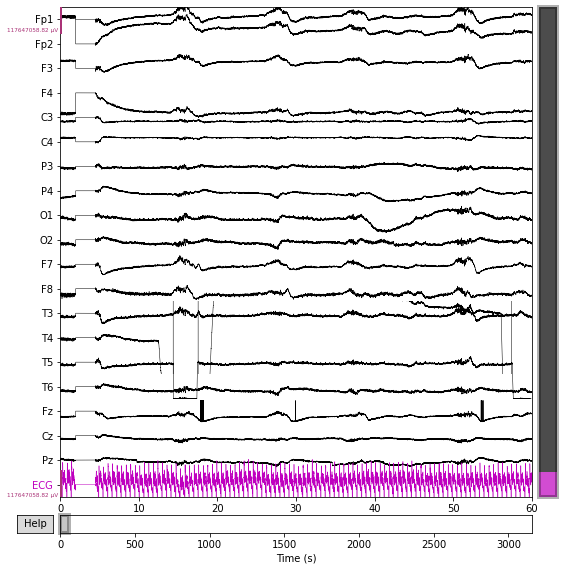

In [478]:
eeg_channels_pt = mne.pick_types(raw.info, eeg=True, ecg=True, meg=False, eog=False, stim=False, exclude='bads')
raw.plot(duration=60, order=eeg_channels_pt, n_channels=len(eeg_channels_pt), remove_dc=False, scalings={'eeg':1/17e-3, 'ecg':1/17e-3})

Low-frequency drifts are readily removed by high-pass filtering at a fairly
low cutoff frequency (the wavelength of the drifts seen above is probably
around 20 seconds, so in this case a cutoff of 0.1 Hz would probably suppress
most of the drift).

### Power line noise

Power line artifacts are easiest to see on plots of the spectrum, so we'll
use :meth:`~mne.io.Raw.compute_psd` to illustrate.



Effective window size : 0.512 (s)


c:\Python38\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  Show the figure.


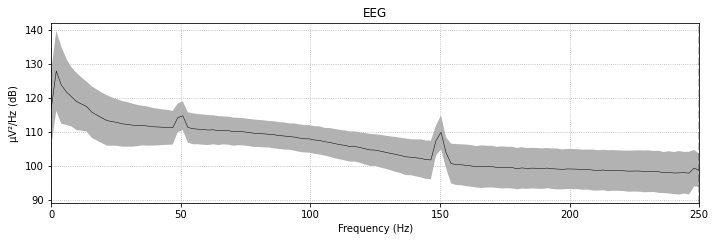

In [479]:
fig = raw.compute_psd(tmax=np.inf, fmax=250).plot(
    average=True, picks="data", exclude="bads"
)
# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(
            x=freqs[idx],
            y=psds[idx] + 18,
            dx=0,
            dy=-12,
            color="red",
            width=0.1,
            head_width=3,
            length_includes_head=True,
        )

Here we see narrow frequency peaks at 60, 120, 180, and 240 Hz — the power
line frequency of the USA (where the sample data was recorded) and its 2nd,
3rd, and 4th harmonics. Other peaks (around 25 to 30 Hz, and the second
harmonic of those) are probably related to the heartbeat, which is more
easily seen in the time domain using a dedicated heartbeat detection function
as described in the next section.


### Heartbeat artifacts (ECG)

MNE-Python includes a dedicated function
:func:`~mne.preprocessing.find_ecg_events` in the :mod:`mne.preprocessing`
submodule, for detecting heartbeat artifacts from either dedicated ECG
channels or from magnetometers (if no ECG channel is present). Additionally,
the function :func:`~mne.preprocessing.create_ecg_epochs` will call
:func:`~mne.preprocessing.find_ecg_events` under the hood, and use the
resulting events array to extract epochs centered around the detected
heartbeat artifacts. Here we create those epochs, then show an image plot of
the detected ECG artifacts along with the average ERF across artifacts. We'll
show all three channel types, even though EEG channels are less strongly
affected by heartbeat artifacts:



In [22]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)

Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 5141 (average pulse 97 / min.)
Not setting metadata
5141 matching events found
No baseline correction applied
Using data from preloaded Raw for 5141 events and 501 original time points ...
1 bad epochs dropped


Not setting metadata
5140 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


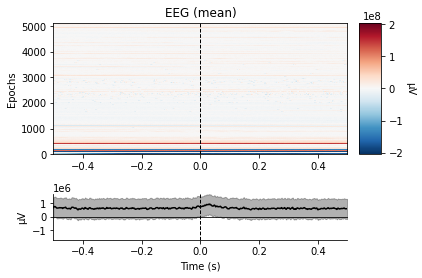

Not setting metadata
5140 matching events found
No baseline correction applied
0 projection items activated
combining channels using "median"


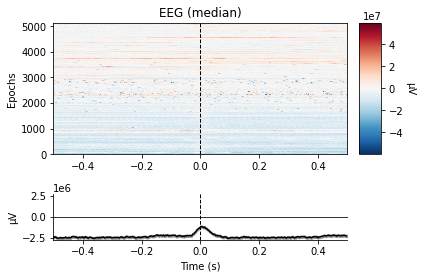

Not setting metadata
5140 matching events found
No baseline correction applied
0 projection items activated
combining channels using "std"


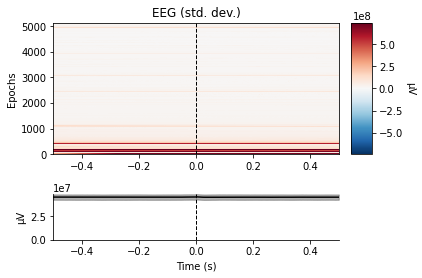

Not setting metadata
5140 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


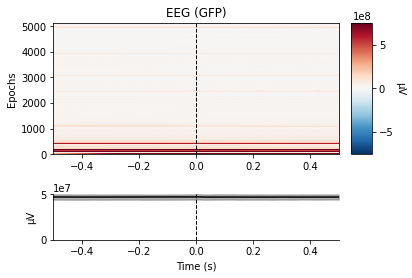

[<Figure size 432x288 with 3 Axes>]

In [23]:
ecg_epochs.plot_image(combine="mean")
ecg_epochs.plot_image(combine="median")
ecg_epochs.plot_image(combine="std")
ecg_epochs.plot_image(combine="gfp")

The horizontal streaks in the magnetometer image plot reflect the fact that
the heartbeat artifacts are superimposed on low-frequency drifts like the one
we saw in an earlier section; to avoid this you could pass
``baseline=(-0.5, -0.2)`` in the call to
:func:`~mne.preprocessing.create_ecg_epochs`.
You can also get a quick look at the
ECG-related field pattern across sensors by averaging the ECG epochs together
via the :meth:`~mne.Epochs.average` method, and then using the
:meth:`mne.Evoked.plot_topomap` method:



In [474]:
avg_ecg_epochs = ecg_epochs.average().apply_baseline((-0.5, -0.2))

Applying baseline correction (mode: mean)


Here again we can visualize the spatial pattern of the associated field at
various times relative to the peak of the EOG response:



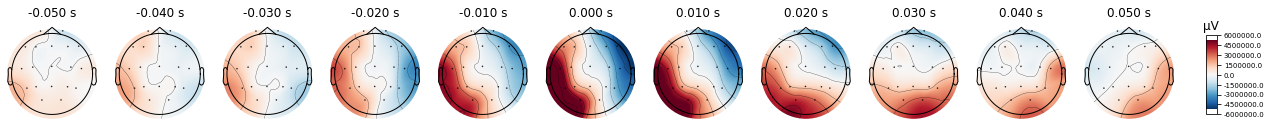

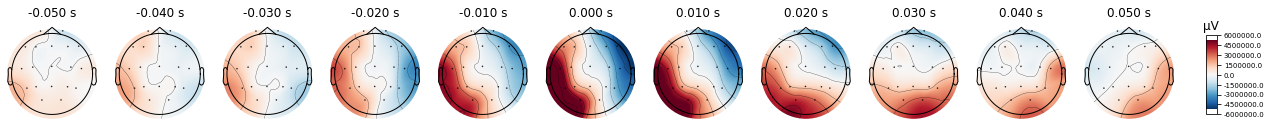

In [475]:
avg_ecg_epochs.plot_topomap(times=np.linspace(-0.05, 0.05, 11))

Or, we can get an ERP/F plot with :meth:`~mne.Evoked.plot` or a combined
scalp field maps and ERP/F plot with :meth:`~mne.Evoked.plot_joint`. Here
we've specified the times for scalp field maps manually, but if not provided
they will be chosen automatically based on peaks in the signal:



No projector specified for this dataset. Please consider the method self.add_proj.


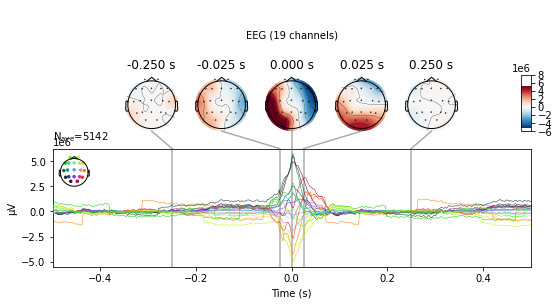

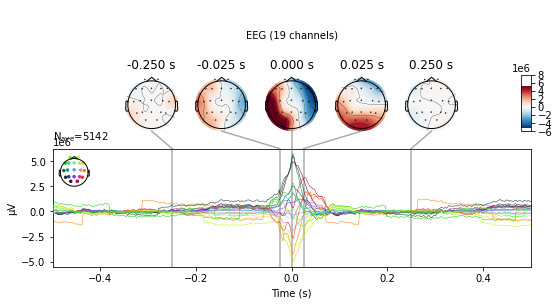

In [476]:
avg_ecg_epochs.plot_joint(times=[-0.25, -0.025, 0, 0.025, 0.25])

In [27]:
# ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
ecg_inds, scores = ica.find_bads_ecg(ecg_epochs, method='ctps')

Using threshold: 0.23 for CTPS ECG detection


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
5142 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
5142 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
5142 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
5142 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
5142 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
5142 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
5142 matching events found
No baseline correction applied
0 projection items activated


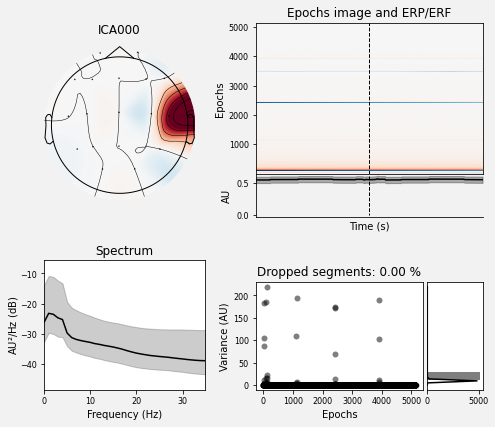

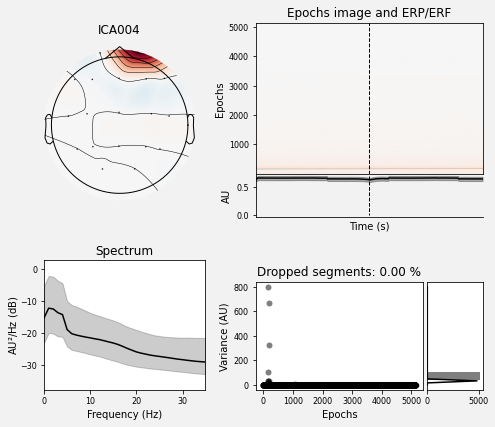

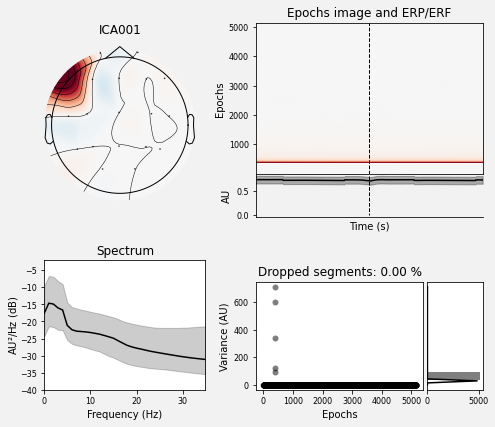

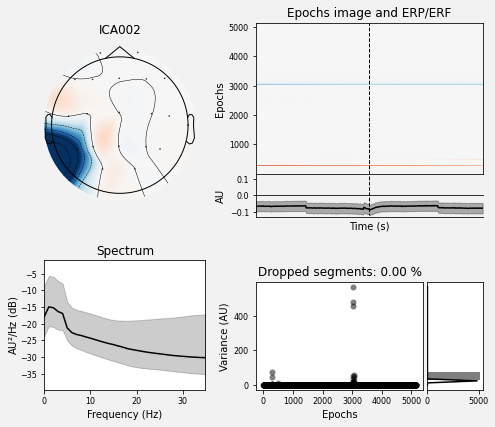

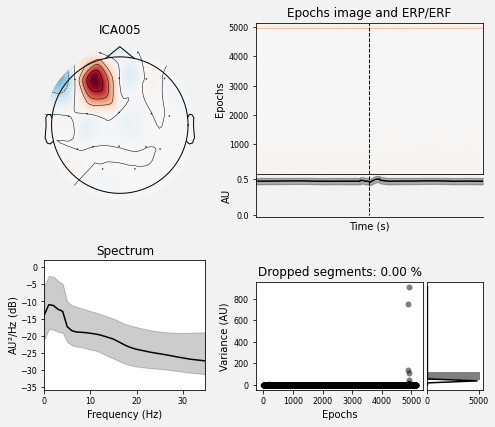

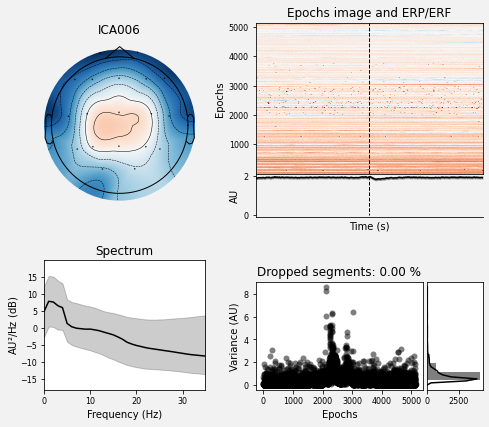

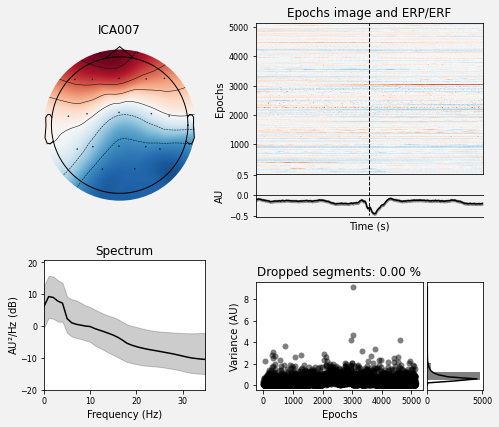

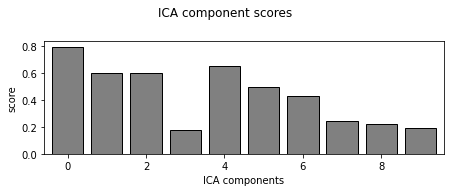

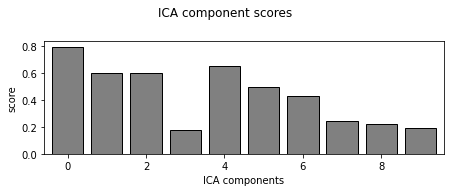

In [521]:
ica.plot_properties(ecg_epochs, picks=ecg_inds, psd_args={'fmax': 35.})
ica.plot_scores(scores)

In [528]:
ica.plot(ica.exclude)

AttributeError: 'ICA' object has no attribute 'plot'

In [525]:
print(ecg_inds)

[0, 4, 1, 2, 5, 6, 7]


In [495]:
ica.exludes = ecg_inds
raw_clean = ica.apply(raw.copy())

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components


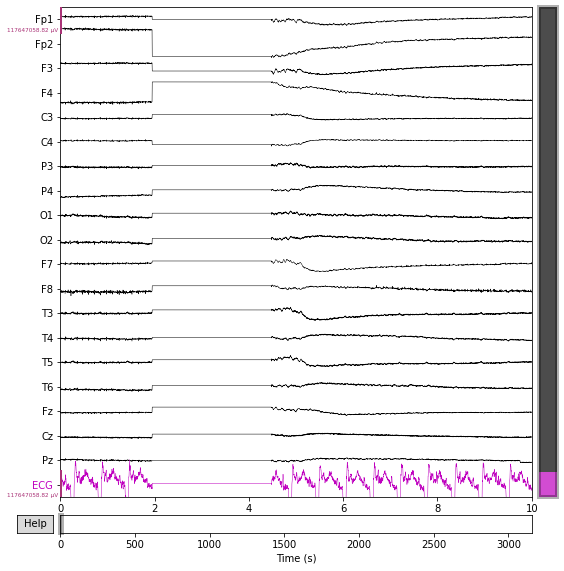

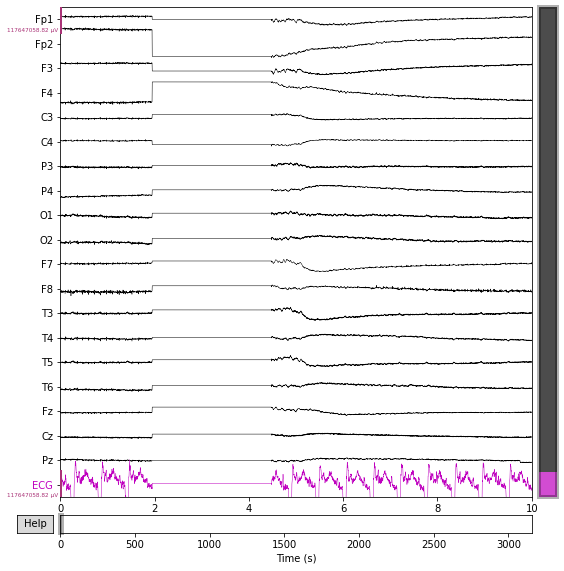

In [527]:
raw.plot(scalings={'eeg': 1/17e-3, 'ecg': 1/17e-3})

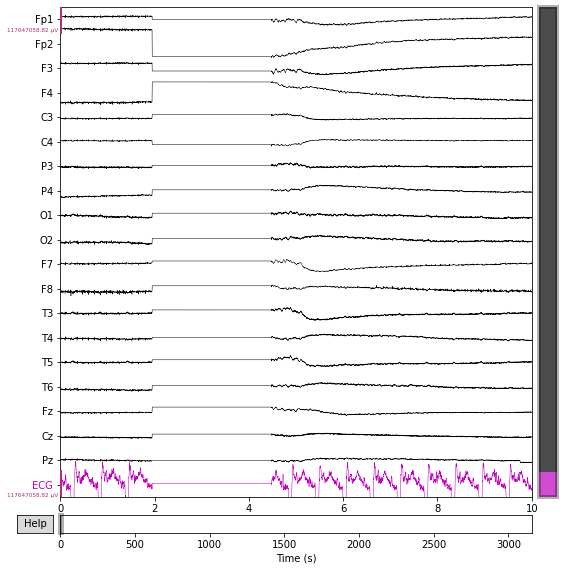

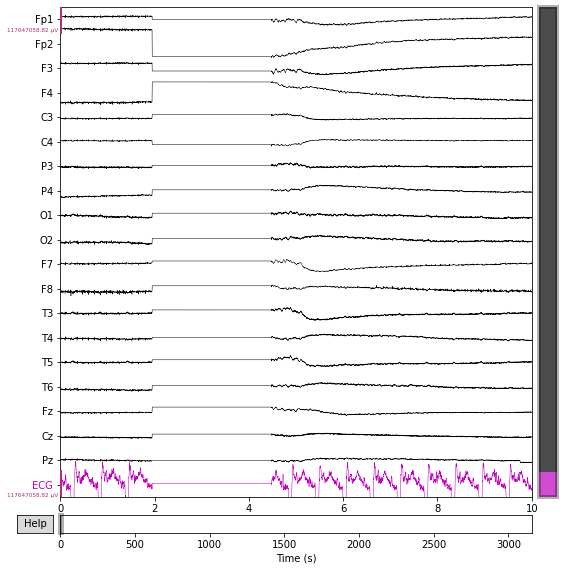

In [526]:
raw_clean.plot(scalings={'eeg': 1/17e-3, 'ecg': 1/17e-3})

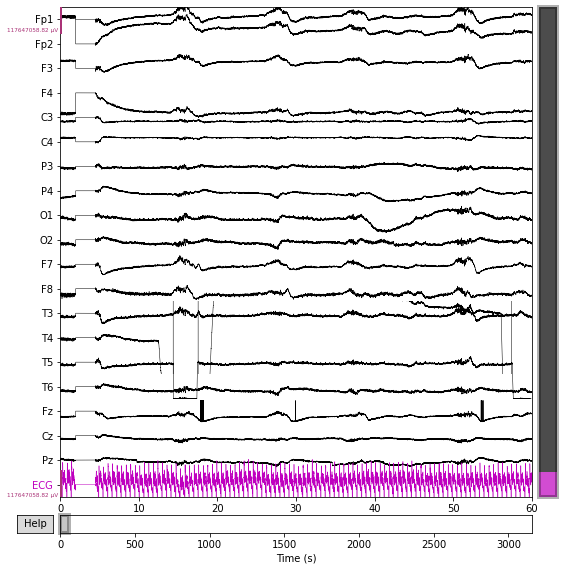

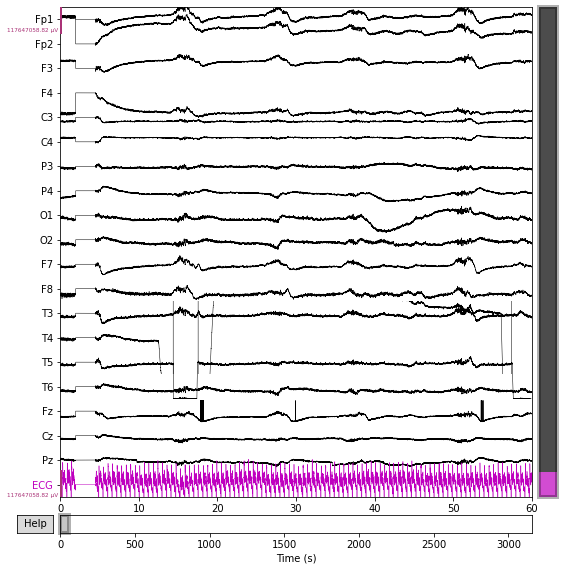

In [493]:
raw_clean.plot(duration=60, order=eeg_channels_pt, n_channels=len(eeg_channels_pt), remove_dc=False, scalings={'eeg':1/17e-3, 'ecg':1/17e-3})

## Summary

Familiarizing yourself with typical artifact patterns and magnitudes is a
crucial first step in assessing the efficacy of later attempts to repair
those artifacts. A good rule of thumb is that the artifact amplitudes should
be orders of magnitude larger than your signal of interest — and there should
be several occurrences of such events — in order to find signal
decompositions that effectively estimate and repair the artifacts.

Several other tutorials in this section illustrate the various tools for
artifact repair, and discuss the pros and cons of each technique, for
example:

- `tut-artifact-ssp`
- `tut-artifact-ica`
- `tut-artifact-sss`

There are also tutorials on general-purpose preprocessing steps such as
`filtering and resampling <tut-filter-resample>` and `excluding
bad channels <tut-bad-channels>` or `spans of data
<tut-reject-data-spans>`.

.. LINKS

   https://en.wikipedia.org/wiki/Mains_electricity



# TensorFlow Layers

In [ ]:
header_file = 'C:\\Users\\kevin\\mne_test_eeg\\0284\\0284_001_004_'

In [ ]:
# EEG channel.
eeg_header_file = os.path.join(header_file + 'EEG' + '.hea')
eeg_data, eeg_channels, eeg_sampling_frequency = load_recording_data(eeg_header_file)

# Check ECG channel.
ecg_header_file = os.path.join(header_file + 'ECG' + '.hea')
ecg_data, ecg_channels, ecg_sampling_frequency = load_recording_data(ecg_header_file)

# Util freq
utility_frequency = None # set to 50 for the final run
with open(eeg_header_file, 'r') as f:
  utility_frequency = get_utility_frequency(f.read())

In [93]:
import tensorflow as tf

class MnePreProceessLayer(tf.keras.layers.Layer):
    def __init__(self, multiplier=1, **kwargs):
        super(MnePreProceessLayer, self).__init__(**kwargs)
        self._montage = mne.channels.make_standard_montage("standard_1020")
        
        self._ica_n_components = 10
        self._ica_random_state = 97
        self._ica_max_iter = 800
        self._ica_methods = 'ctps'
    
    def plot_config_montage(self):
        self._montage.plot()  # 2D
        fig = self._montage.plot(kind="3d", show=False)  # 3D
        fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

    def call(self, eeg_inputs, ecg_inputs, utility_frequency):
        assert eeg_inputs.shape[0] == ecg_inputs.shape[0] # Data size does not match.

        eeg_outputs = list()
        has_ecg_count = 0
        
        for eeg_input, ecg_input in zip(eeg_inputs, ecg_inputs):           
            if ecg_input is None:
                eeg_outputs.append(eeg_input)
            else: 
                has_ecg_count += 1
                data = self.removes_ECG_artifact(eeg_input, ecg_input)

                # Excluding ECG 
                eeg_outputs.append(data) 

        print(f"Successfully pre-process {has_ecg_count} out of {eeg_inputs.shape[0]}.")
        return eeg_outputs
    
    def removes_ECG_artifact(self, eeg_input, ecg_input):
        """ Removes ECG Artifact from EEG with mne-ICA 
        input:
            eeg_input = list(eeg_data, eeg_channels, eeg_sampling_frequency)
            ecg_input = list(ecg_data, ecg_channels, ecg_sampling_frequency)
        return:
            An <np.ndarray> EEG data, shape of (channel, timestamp).
        """

        with mne.use_log_level("warning"):
            # Unpack EEG Data
            eeg_data, eeg_channels, eeg_sampling_frequency = eeg_input
            
            # Check if ECG data is available
            if ecg_input is None:
                raise ValueError
            
            # Unpack ECG Data
            ecg_data, ecg_channels, ecg_sampling_frequency = ecg_input
            assert eeg_data.shape[0] == 19  # Channels shall be 19 as the Moody Challange Data
            assert ecg_data.shape[1] == 1   # ECG shall only has 1 channels
            assert eeg_data.shape[1] == ecg_data.shape[1]   # Timestamp does not match
            
            # Setup Raw: EEG
            raw = mne.io.RawArray(eeg_data, mne.create_info(eeg_channels, eeg_sampling_frequency, ch_types='eeg'))
            
            # Setup Raw: Montage & ECG 
            raw.set_montage(selected_montage)
            raw.add_channels([mne.io.RawArray(ecg_data, mne.create_info(ecg_channels, ecg_sampling_frequency, ch_types='ecg'))]) # add EOG channels
            raw.pick_types(meg=False, eeg=True, ecg=True, eog=False)  # remove other channels

            # Setup ICA and ECG Epoch 
            ica = mne.preprocessing.ICA(n_components=self._ica_n_components, random_state=self._ica_random_state, max_iter=self._ica_max_iter)
            ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)

            # Find ECG Artifact
            ica.fit(raw.copy().filter(0.1, utility_frequency))
            ecg_inds, scores = ica.find_bads_ecg(ecg_epochs, method=self._ica_methods)

            # ica.plot_properties(ecg_epochs, picks=ecg_inds, psd_args={'fmax': 35.})
            # ica.plot_scores(scores)
            
            # Removes ECG Artifact on Raw
            ica.exludes = ecg_inds
            raw_clean = ica.apply(raw.copy())
            data, _ = raw_clean[:,:] 

        # Excluding ECG 
        return data[:-1,:]

SyntaxError: invalid syntax (Temp/ipykernel_18176/341242645.py, line 26)

In [3]:
ll = [[1,2,3], [1,2,3], [1,2,3], [1,2,3]]
for i in ll:
  print(i)

[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]


In [48]:
header_file = 'C:\\Users\\kevin\\mne_test_eeg\\0284\\0284_001_004_'
eeg_header_file = os.path.join(header_file + 'EEG' + '.hea')
ecg_header_file = os.path.join(header_file + 'ECG' + '.hea')

In [55]:
eeg_input = load_recording_data(eeg_header_file)
try:
  ecg_input = load_recording_data(ecg_header_file)
except FileNotFoundError:
  ecg_input = None

In [56]:
eeg_outputs = list()
has_ecg_count = 0
show_processes = False

In [89]:
mne.set_log_level(True)

In [86]:
print(mne.get_config("MNE_LOGGING_LEVEL"))

None


In [92]:
with mne.use_log_level("warning"):
    if ecg_input is None:
        eeg_outputs.append(eeg_input)
    else: 
        has_ecg_count += 1

        # Unpack Data
        eeg_data, eeg_channels, eeg_sampling_frequency = eeg_input
        ecg_data, ecg_channels, ecg_sampling_frequency = ecg_input
        assert eeg_data.shape[0] == 19
        assert ecg_data.shape[0] == 1
        assert eeg_data.shape[1] == ecg_data.shape[1] 
        
        # Setup Raw: EEG
        raw = mne.io.RawArray(eeg_data, mne.create_info(eeg_channels, eeg_sampling_frequency, ch_types='eeg'))
        
        # Setup Raw: Montage & ECG 
        raw.set_montage(selected_montage)
        raw.add_channels([mne.io.RawArray(ecg_data, mne.create_info(ecg_channels, ecg_sampling_frequency, ch_types='ecg'))]) # add EOG channels
        raw.pick_types(meg=False, eeg=True, ecg=True, eog=False)  # remove other channels

        # Setup ICA and ECG Epoch 
        ica = mne.preprocessing.ICA(n_components=10, random_state=97, max_iter=800)
        ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)

        # Find ECG Artifact
        ica.fit(raw.copy().filter(0.1, utility_frequency))
        ecg_inds, scores = ica.find_bads_ecg(ecg_epochs, method='ctps')

        # ica.plot_properties(ecg_epochs, picks=ecg_inds, psd_args={'fmax': 35.})
        # ica.plot_scores(scores)
        
        # Removes ECG Artifact on Raw
        ica.exludes = ecg_inds
        raw_clean = ica.apply(raw.copy())
        data, _ = raw_clean[:,:]

        # Excluding ECG 
        eeg_outputs.append(data[:-1,:])

KeyboardInterrupt: 

In [76]:
eeg_outputs[0].shape

(19, 1578500)